# Annual C02 Emissions By Countries

## Context:

Carbon dioxide emissions are the primary driver of global climate change. It’s widely recognised that to avoid the worst impacts of climate change, the world needs to urgently reduce emissions. But, how this responsibility is shared between regions, countries, and individuals has been an endless point of contention in international discussions.

This debate arises from the various ways in which emissions are compared: as annual emissions by country; emissions per person; historical contributions; and whether they adjust for traded goods and services. These metrics can tell very different stories.

## Objectives:

This study aims at analysis and finding the pattern of C02 emissions by different countires from the mid-18th century to 2020. Following are the some insights we are looking for from this exploratory data analysis:
- How have global emissions of carbon dioxide (CO2) changed over time?
- Who emits the most CO2 each year?
- Share of global CO2 emissions by country
- What is the global average annual C02 emissions from 1750 to 2020?
- What is total annual C02 emissions by all countries in year 2010? 
- Top five countries with highest C02 emissions in the year 2018.
- Top five countries with lowest C02 emissions in the year 2018.
- What is the trend of annual C02 emission of world from year 2019 and in year 2022.
- The comparison of annual C02 emissions among China, India, US and Russia in year 2015
- How much Pakistan contributed in C02 emissions in year 2020 globally?
- What percentage of India contributed in C02 emissions in year 2020 globally?
- Which country was top contributor in year 2000?
- which country was least contributor in year 2000?
- Comparison of C02 emission from high, low and middle income countries
- Are Pakistan, USA, India, China, Russia making progress on reducing emissions? 


# About Dataset:

This dataset is taken from the website 'Our World In Data' for the purpose of Exploratory Data Analysis. This dataset contains the annual C02 emissions by country from mid 18th century to 2020. This also contains C02 emmisions from the continents, Countries' income level, and world for different years.

Link to download dataset: https://ourworldindata.org/co2-emissions


## Import Relevant Libraries

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load dataset
df = pd.read_csv("annual-co2-emissions-per-country.csv")
df.head()

,Entity,Code,Year,Annual CO2 emissions
0,Afghanistan,AFG,1949,14656
1,Afghanistan,AFG,1950,84272
2,Afghanistan,AFG,1951,91600
3,Afghanistan,AFG,1952,91600
4,Afghanistan,AFG,1953,106256


# Step-1 Dataset Shape

In [4]:
# check for number of rows and columns
df.shape

(24670, 4)

In [5]:
# view all columns present in dataset
df.columns

Index(['Entity', 'Code', 'Year', 'Annual CO2 emissions'], dtype='object')

Insights:
- The total observations in our dataset are 24760.
- Total features are four including entity, code, year, annual C02 emissions.

# Step-2 Data Structure

In [6]:
# view information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24670 entries, 0 to 24669
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Entity                24670 non-null  object
 1   Code                  21299 non-null  object
 2   Year                  24670 non-null  int64 
 3   Annual CO2 emissions  24670 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 771.1+ KB


In [7]:
# view memory usage by each column in dataset
df.memory_usage()

Index                      128
Entity                  197360
Code                    197360
Year                    197360
Annual CO2 emissions    197360
dtype: int64

Insights:
- The RAM memory consumed by this dataset is around 771KB.
- The year and annual CO2 emissions have data type integer.
- The Entity and code columns have data type object.
- The code column contains some null values only.
  


# Step-3 Splitting the dataset
Since our dataset contains annual CO2 emissions from all the countries, continents, Countries' income level, and world for different years.
We therefore need to seperate it into three sub datasets.
  - One dataset will contain the observations from world only.
  - Second dataset will contain observations from  the countries only.
  - Third dataset will contain observations from continents and income level status of countries

In [8]:
# Subset of annual CO2 emissions by whole worLd
df_world = df.loc[df.Entity == 'World']
df_world.shape

(271, 4)

In [10]:
# view top 5 records
df_world.head()

,Entity,Code,Year,Annual CO2 emissions
24139,World,OWID_WRL,1750,9350528
24140,World,OWID_WRL,1751,9350528
24141,World,OWID_WRL,1752,9354192
24142,World,OWID_WRL,1753,9354192
24143,World,OWID_WRL,1754,9357856


In [11]:
# Subset of annual CO2 emissions by all countries
#df_countries = df[df.Code.notnull()]
# delete the entities records which contain global data
#df_countries = df_countries.loc[df['Entity'] != 'World']
#df_countries.shape

In [12]:
# Subset of annual CO2 emissions by all countries only
df_countries = df[df.Code.notnull() & (df['Entity'] != 'World')]
df_countries.shape

(21028, 4)

In [13]:
# view top 5 records
df_countries.head()

,Entity,Code,Year,Annual CO2 emissions
0,Afghanistan,AFG,1949,14656
1,Afghanistan,AFG,1950,84272
2,Afghanistan,AFG,1951,91600
3,Afghanistan,AFG,1952,91600
4,Afghanistan,AFG,1953,106256


In [14]:
# Subset of annual CO2 emissions by rest of the entities
df_others = df[df.Code.isnull()]
df_others.shape

(3371, 4)

In [15]:
# top 5 records
df_others.head()

,Entity,Code,Year,Annual CO2 emissions
72,Africa,NaN,1884,21984
73,Africa,NaN,1885,36640
74,Africa,NaN,1886,47632
75,Africa,NaN,1887,47632
76,Africa,NaN,1888,80608


# Step-4 Statistical Summary

In [16]:
# view statistical summary on the countries dataset
df_countries.describe()

,Year,Annual CO2 emissions
count,21028.000000,2.102800e+04
mean,1960.697974,7.864537e+07
std,46.485653,4.223285e+08
min,1750.000000,3.400000e+01
25%,1937.000000,4.382452e+05
50%,1971.000000,3.405134e+06
75%,1996.000000,2.549935e+07
max,2020.000000,1.066789e+10


Insights:
- The average annual C02 emissions by all countires is 78.64 million tonnes in span from mid 18th century to year 2020.
- The highest annual C02 emissions is recorded to be around 10.7 billion tonnes by any country till 2020.
- The lowest annual C02 emissions by any country in span from 1750-2020 is 34 tonnes.


In [17]:
# view statistical summary on the countries dataset
df_world.describe()

,Year,Annual CO2 emissions
count,271.000000,2.710000e+02
mean,1885.000000,6.260237e+09
std,78.375166,9.943308e+09
min,1750.000000,9.350528e+06
25%,1817.500000,4.953728e+07
50%,1885.000000,1.009675e+09
75%,1952.500000,6.556711e+09
max,2020.000000,3.670250e+10


Insights:
- The global average annual C02 emissions by all countires is 6.2 billion tonnes in span from mid 18th century to year 2020.
- The global highest annual C02 emissions is recorded to be around 36.7 billion tonnes till 2020 in one year.
- The lowest annual C02 emissions with respect to world in span from 1750-2020 is 9.3 million tonnes.
- From global perspective, we have increased the annual C02 emissions by approximately 4000 time in the span of 270 years.


# Step-5 Check Duplicates

In [18]:
# check for duplicates records in our rows
df.duplicated().sum()

0

In [19]:
# check for duplicates values in column Entity
df.duplicated(subset=['Entity']).sum()

24423

In [20]:
# check for duplicates values in column Code
df.duplicated(subset=['Code']).sum()

24446

Insight: 
- No duplicate records were found in rows of our dataset.
- 24423 duplicate values were found in the column Entity of our dataset
- 24446 duplicate values were found in the column Code.
- We have duplicate entries in both columns because the observations consist of different years.


# Step-6 Find Null Values

In [21]:
# We now know the Code column contains nan values, let's check the number of nan values.
df.isnull().sum()

Entity                     0
Code                    3371
Year                       0
Annual CO2 emissions       0
dtype: int64

Insight: 
- The code column contains 3371 null values, whereas rest of the columns have no null values.

In [22]:
# calculate percentage of nan values in the dataset

null_perc = df.isnull().sum()/df.shape[0] *100
null_perc

Entity                   0.00000
Code                    13.66437
Year                     0.00000
Annual CO2 emissions     0.00000
dtype: float64

Insight: 
- The code column contains a total of 13.66% null values.
- However, the code column is actually a code of the respective country in the entity column.
- Therefore, we can drop this code column without any effect on dataset.

In [23]:
# remove code column in dataset (axis=1 for column)
df = df.drop(['Code'], axis=1)
df.head()

,Entity,Year,Annual CO2 emissions
0,Afghanistan,1949,14656
1,Afghanistan,1950,84272
2,Afghanistan,1951,91600
3,Afghanistan,1952,91600
4,Afghanistan,1953,106256


In [41]:
# rename Entity column for simplicity
df_countries.rename(columns={'Annual CO2 emissions':'Annual_CO2_emissions'}, inplace=True)
df_countries.head()

,Entity,Code,Year,Annual_CO2_emissions
0,Afghanistan,AFG,1949,14656
1,Afghanistan,AFG,1950,84272
2,Afghanistan,AFG,1951,91600
3,Afghanistan,AFG,1952,91600
4,Afghanistan,AFG,1953,106256


# Step-7 Value count of specific column

In [25]:
df['Year'].value_counts()

2019    237
2010    237
2002    237
2003    237
2004    237
       ... 
1761      6
1762      6
1763      6
1764      6
1784      6
Name: Year, Length: 271, dtype: int64

In [26]:
df['Entity'].value_counts()

Europe (excl. EU-27)        271
World                       271
European Union (28)         271
High-income countries       271
United Kingdom              271
                           ... 
French Equatorial Africa      9
French West Africa            9
Leeward Islands               7
Kuwaiti Oil Fires             1
Puerto Rico                   1
Name: Entity, Length: 247, dtype: int64

# Step-8 Finding Unique Values

In [27]:
# view number of unique entities
df['Entity'].nunique()

247

In [28]:
# view names of unique entities
df['Entity'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Asia', 'Asia (excl. China & India)',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Gu

In [29]:
# view number of unique Years
df['Year'].nunique()

271

In [30]:
# view all unique Years
df['Year'].unique()

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 1884, 1885, 1886, 1887, 1888,
       1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899,
       1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1830, 1831, 1832, 1833, 1850, 1855,
       1858, 1859, 1860, 1861, 1862, 1863, 1864, 18

# Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

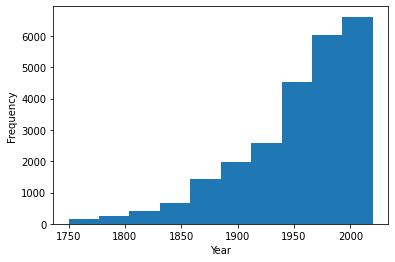

In [31]:
# plot histogram
plt.hist(df.Year)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show

In [ ]:
# plot distplot
sns.displot(df_countries.Year)


<BarContainer object of 21028 artists>

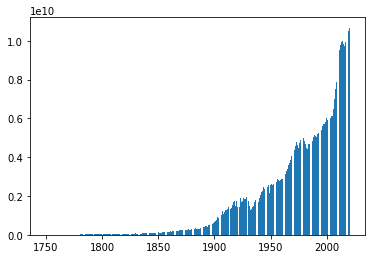

In [42]:
# Total yearly co2 emissions
plt.bar(df_countries.Year, df_countries.Annual_CO2_emissions)

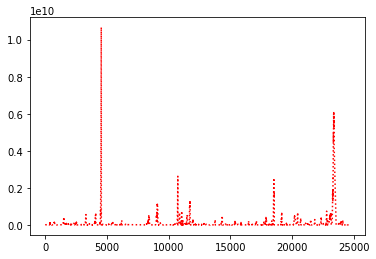

In [43]:
# To get the total CO2 emission rate from previous to latest
plt.plot(df_countries.Annual_CO2_emissions, linestyle = 'dotted', color='Red')
plt.show()

In [45]:
# To get the largest ten CO2 Emission Rates. 
df_largest= df_countries.nlargest(10, ['Annual_CO2_emissions'])
df_largest

,Entity,Code,Year,Annual_CO2_emissions
4536,China,CHN,2020,10667887453
4535,China,CHN,2019,10489988555
4534,China,CHN,2018,10289989525
4530,China,CHN,2014,9985583382
4529,China,CHN,2013,9952743755
4533,China,CHN,2017,9920459189
4531,China,CHN,2015,9848419740
4528,China,CHN,2012,9775621803
4532,China,CHN,2016,9720444086
4527,China,CHN,2011,9528555734


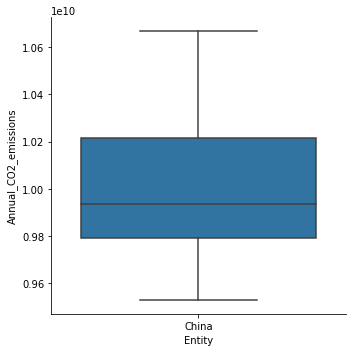

In [46]:
# Box plot of largest ten CO2 Emission rates.
sns.catplot(x="Entity", y="Annual_CO2_emissions", kind="box", data=df_largest)

In [47]:
# To get the least ten CO2 Emission rates
df_smallest= df_countries.nsmallest(10,['Annual_CO2_emissions'] ) 
df_smallest

,Entity,Code,Year,Annual_CO2_emissions
756,Armenia,ARM,1832,34
754,Armenia,ARM,1830,42
757,Armenia,ARM,1833,42
755,Armenia,ARM,1831,50
21522,Tajikistan,TJK,1832,50
8728,Georgia,GEO,1832,60
21520,Tajikistan,TJK,1830,62
21523,Tajikistan,TJK,1833,62
8726,Georgia,GEO,1830,75
8729,Georgia,GEO,1833,75


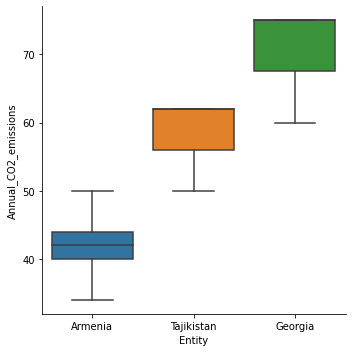

In [48]:
# Boxplots of Least values of CO2 Emission
sns.catplot(x="Entity", y="Annual_CO2_emissions", kind="box", data=df_smallest)

In [51]:
# To get the annual co2 emission rate  of pakistan from 2010 to 2020.
df2= df_countries[(df_countries.Entity=="Pakistan") & (df.Year>=2010)]
df2.head()

C:\Users\HP\AppData\Local\Temp/ipykernel_7076/720771030.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2= df_countries[(df_countries.Entity=="Pakistan") & (df.Year>=2010)]


,Entity,Code,Year,Annual_CO2_emissions
17107,Pakistan,PAK,2010,154145307
17108,Pakistan,PAK,2011,154659589
17109,Pakistan,PAK,2012,153876181
17110,Pakistan,PAK,2013,150450706
17111,Pakistan,PAK,2014,156243128


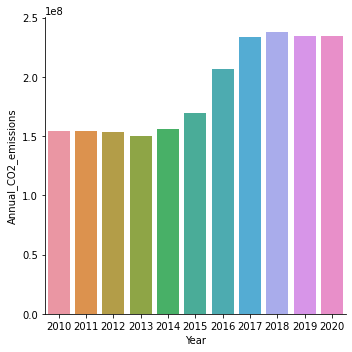

In [52]:
# To draw the bar chart of Annual CO2 Emission rate in pakistan during 2010-2020.
sns.catplot(x="Year", y="Annual_CO2_emissions", kind="bar", data=df2)

### It shows that in Pakistan CO2 is extremely emitted in 2018. 

In [54]:
# To get the CO2 Emission rate of Japan and Italy to onwards 2010.
df3= df_countries[(df_countries.Year>=2010) & (df.Entity=="Italy")|(df.Entity=="Japan")] 
df3

C:\Users\HP\AppData\Local\Temp/ipykernel_7076/1717173742.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3= df_countries[(df_countries.Year>=2010) & (df.Entity=="Italy")|(df.Entity=="Japan")]


,Entity,Code,Year,Annual_CO2_emissions
11503,Italy,ITA,2010,436153683
11504,Italy,ITA,2011,424277527
11505,Italy,ITA,2012,403447214
11506,Italy,ITA,2013,369834337
11507,Italy,ITA,2014,349581755
...,...,...,...,...
11733,Japan,JPN,2016,1203717880
11734,Japan,JPN,2017,1188122842
11735,Japan,JPN,2018,1143457876
11736,Japan,JPN,2019,1105929335


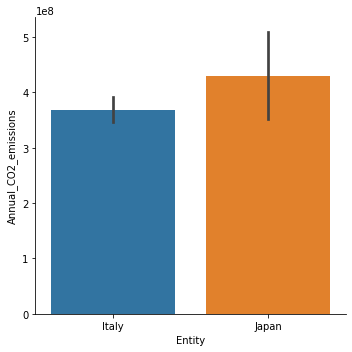

In [56]:
# Barplot of Japan and Italy to differntiate between the CO2 Emission rate of Japan and Italy  
sns.catplot(x="Entity", y="Annual_CO2_emissions", kind="bar", data=df3)

In [ ]:
# import library
import plotly.express as px

In [ ]:
# plot annual CO2 emissions by each entity in the respective years
fig = px.line(df, x="Year", y="Annual_CO2_emissions", color='Entity')
fig.show()

In [ ]:
# plot the annual co2 emissions by whole world
fig = px.line(df[df.Entity=='World'] , x="Year", y="Annual_CO2_emissions")
fig.show()

In [ ]:
# yearly co2 emissions by Pakistan 
fig = px.line(df[df.Entity=='Pakistan'] , x="Year", y="Annual_CO2_emissions")
fig.show()